# Простейшие алгоритмы классификации

## Подготовка данных.

In [35]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.animation as animation
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree;
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [195]:
data = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="final")

In [251]:
y = data["классификация"]

In [5]:
data = data.drop(data.columns[[17,18,19,25]], axis = 1)

In [33]:
values = data.values

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(values)

In [35]:
scaled_data

array([[-0.08628272, -0.28529667,  1.19292096, ..., -0.80455698,
        -1.69481667, -0.80321933],
       [ 0.77328854, -0.37339652,  0.043015  , ..., -0.73932263,
        -0.92444546,  1.60643866],
       [ 0.01139583,  0.15520256,  0.55408431, ...,  0.63059871,
        -0.92444546, -0.80321933],
       ...,
       [-0.47699693,  0.01424281, -0.46805431, ..., -0.73932263,
         1.00148258,  0.40160966],
       [-0.28163983, -0.59364613, -0.59582164, ..., -1.19596307,
         1.38666819, -0.80321933],
       [-0.67235404,  0.33140226, -0.49360778, ...,  1.804817  ,
         1.38666819,  1.60643866]])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data, y, test_size=0.3,
random_state=17)

In [38]:
X_train

array([[-4.76996931e-01,  1.42428085e-02, -4.68054313e-01,
        -1.35700307e-02, -7.71669330e-01,  4.53864996e-01,
        -2.76759895e-01, -1.81377090e-01, -5.55025008e-01,
        -9.26500477e-01, -6.99439139e-01, -8.41698454e-01,
        -8.33720115e-01, -6.77103270e-01, -2.36636486e-01,
        -5.61147773e-01,  4.27186783e-02, -8.79265222e-01,
        -5.57386411e-01,  1.07183309e+00, -7.39322628e-01,
         1.00148258e+00],
       [-2.03496984e-01, -2.67676701e-01,  5.66861048e-01,
         8.45865249e-01,  1.07958583e+00, -1.10529476e+00,
        -2.13859919e-01,  7.14083031e-03,  7.43915818e-01,
         7.18949412e-01,  7.67300283e-01,  1.65241414e-01,
         9.78189727e-01,  1.00863101e+00, -8.35910705e-01,
         5.43957250e-01,  1.64772045e-01, -8.89144606e-02,
        -5.57386411e-01,  4.69196012e-01, -6.74088278e-01,
        -9.24445459e-01],
       [-8.67711141e-01,  2.57794834e+00, -1.23465828e+00,
        -6.46838132e-01, -7.71669330e-01,  8.59673699e-01,
    

In [39]:
X_test

array([[-5.94211194e-01, -1.16629514e+00, -1.15799789e+00,
         1.22130277e-01, -7.71669330e-01, -1.16936981e+00,
        -8.74309667e-01, -1.25535797e+00, -7.06947911e-01,
        -9.82595360e-01, -9.92787023e-01, -8.15879483e-01,
        -8.33720115e-01, -1.01425013e+00, -3.28832520e-01,
        -1.00318978e+00, -3.23441422e-01, -8.79265222e-01,
        -5.57386411e-01,  1.02878759e+00, -3.47916531e-01,
         2.31111365e-01],
       [-2.81639826e-01, -5.93646133e-01, -5.95821642e-01,
        -3.75437517e-01, -7.71669330e-01, -6.35410995e-01,
        -6.06984769e-01, -5.01286288e-01, -1.02598601e+00,
        -1.00129365e+00, -6.99439139e-01, -8.67517425e-01,
        -8.33720115e-01, -6.77103270e-01,  2.70441699e-01,
        -6.34821441e-01, -7.93346883e-02, -8.79265222e-01,
        -5.57386411e-01,  8.56605564e-01, -1.19596307e+00,
         1.38666819e+00],
       [ 1.86728833e+00,  1.62647000e+00,  1.83175760e+00,
         1.43389991e+00,  1.26739432e+00,  1.24412405e+00,
    

In [40]:
Y_train

57    1
11    2
37    0
29    0
8     1
35    1
18    0
19    0
42    0
24    1
13    0
25    0
52    2
12    0
2     0
5     2
32    0
59    2
30    0
38    0
27    0
56    2
3     0
34    0
10    0
41    2
17    0
1     2
7     0
44    1
20    2
39    0
4     1
31    1
55    1
45    0
48    0
22    0
6     0
15    0
49    1
47    0
Name: классификация, dtype: int64

In [41]:
Y_test

16    0
58    0
40    2
51    2
21    2
9     2
54    0
46    1
33    0
50    2
0     0
28    1
23    0
36    1
53    2
43    0
26    0
14    0
Name: классификация, dtype: int64

# Дерево принятия решений для исходной таблицы

In [42]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=7)

model_tree.fit(X_train, Y_train);

In [43]:
tree_pred = model_tree.predict(X_test)

accuracy_score(Y_test, tree_pred)

0.6111111111111112

In [44]:
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 7,
 'splitter': 'best'}

In [45]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

In [46]:
tree_grid = GridSearchCV(model_tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [47]:
model_tree_grid=tree_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    5.5s finished


In [48]:
tree_grid.best_score_

0.5722222222222222

In [49]:
tree_grid.best_params_

{'max_depth': 2, 'max_features': 4}

In [50]:
accuracy_score(Y_test, tree_grid.predict(X_test))

0.3888888888888889

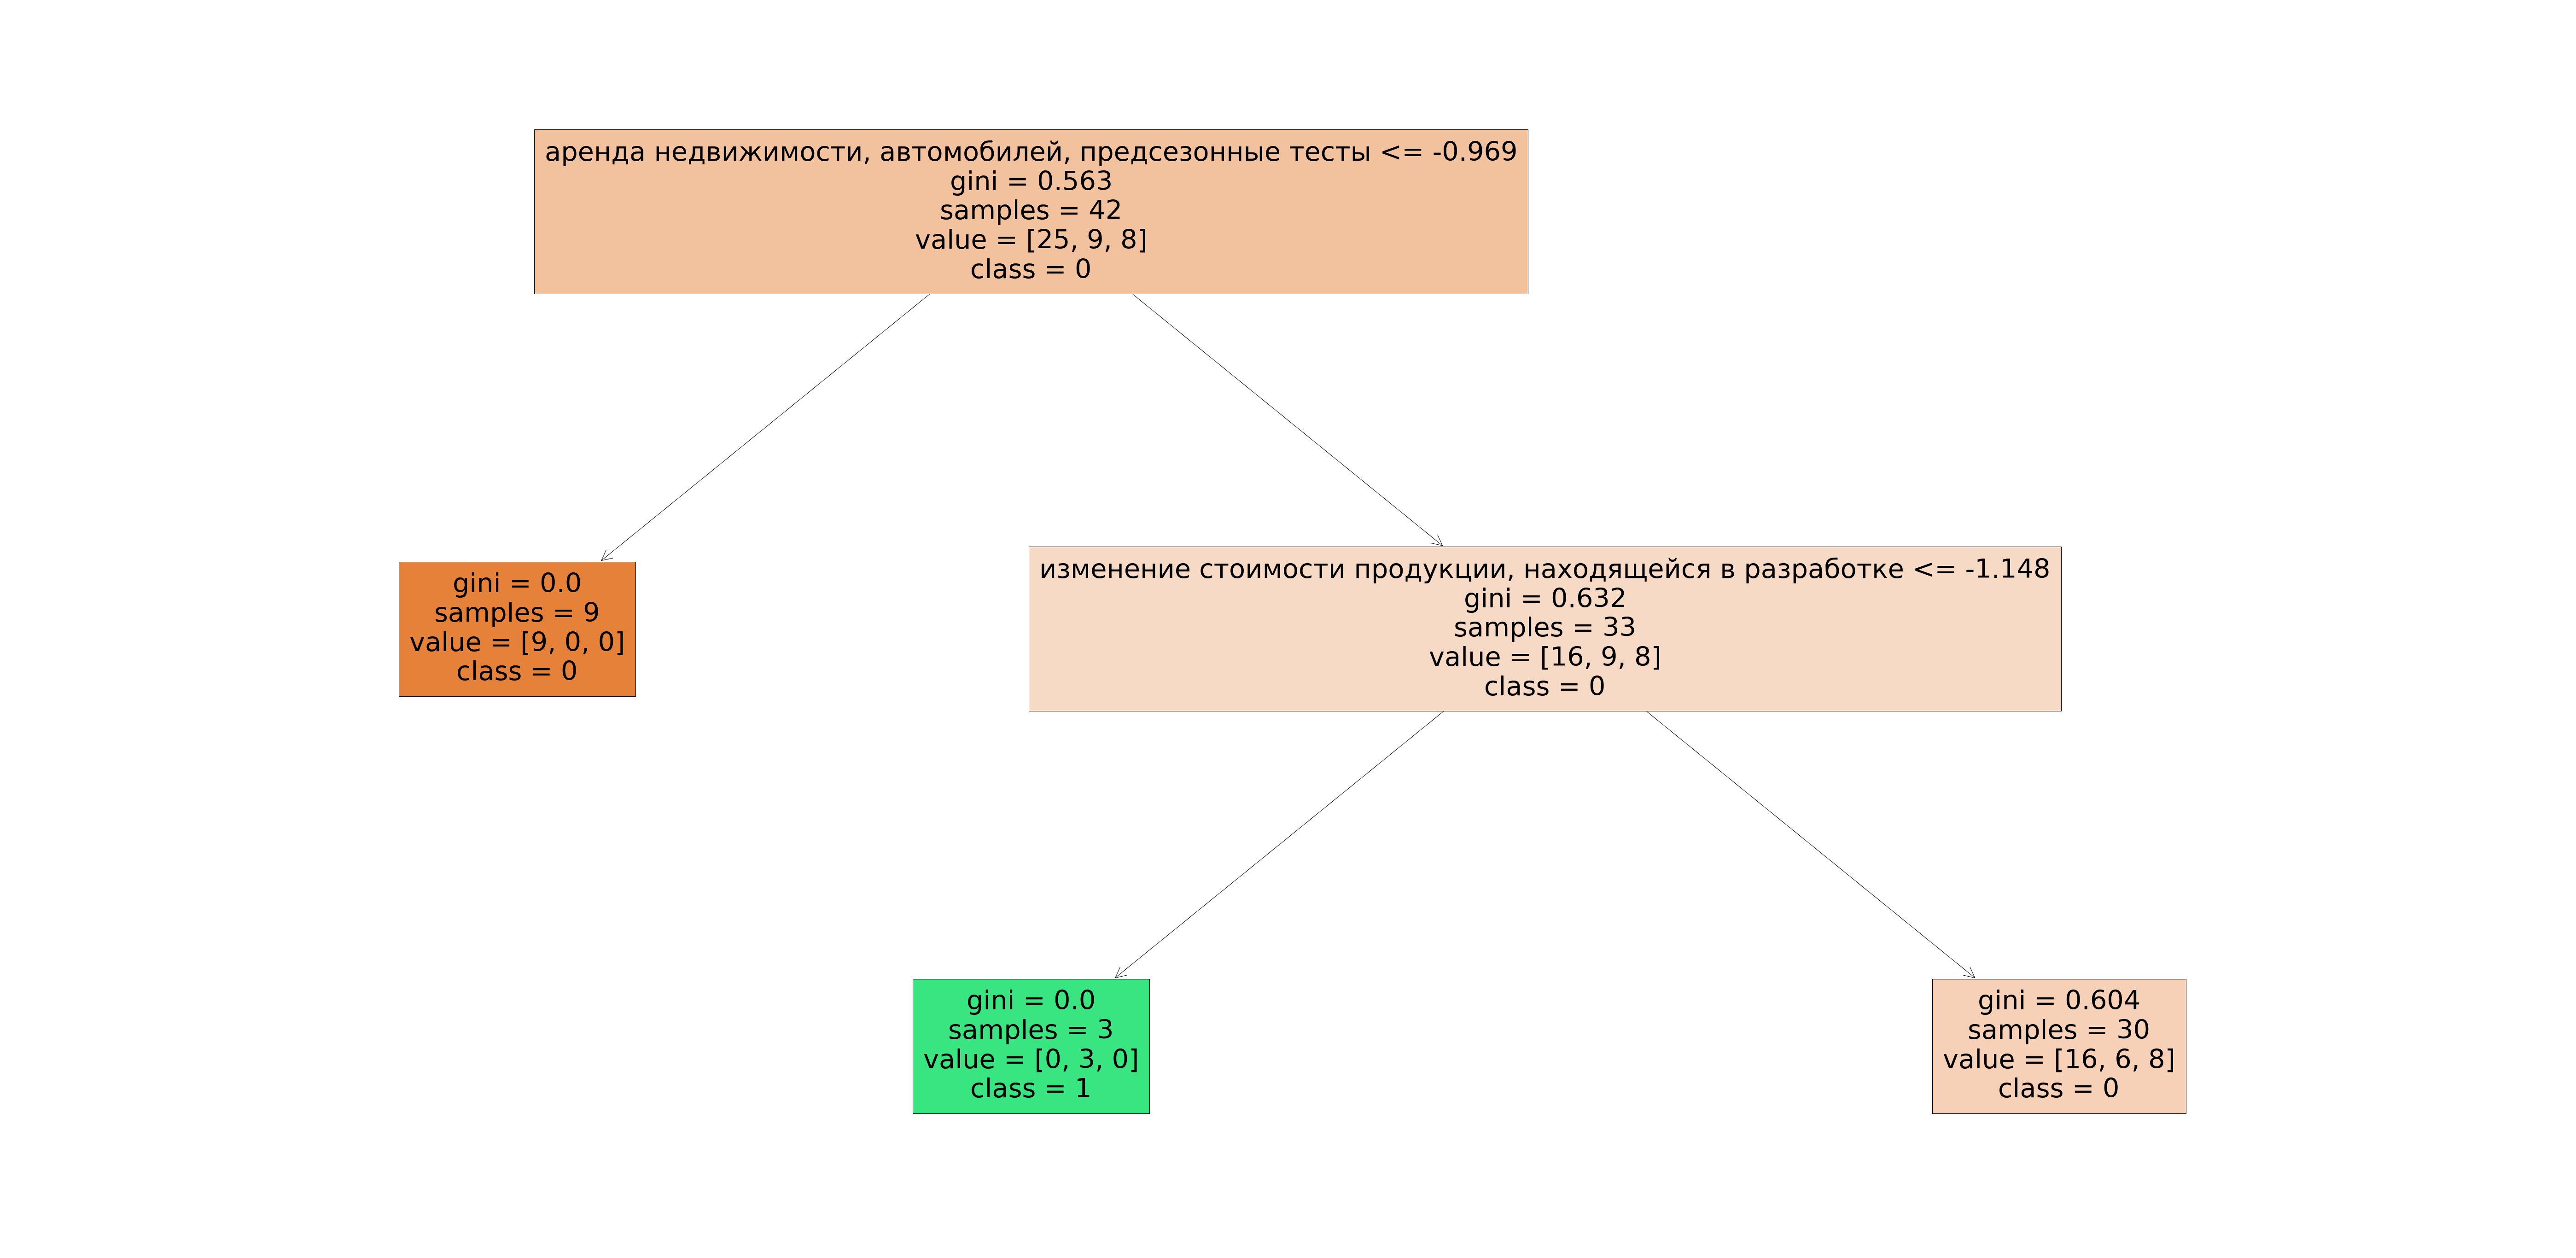

In [51]:
model = DecisionTreeClassifier(max_depth=2,max_features=4, random_state=17)
model.fit(X_train, Y_train)

from sklearn import tree

fig = plt.figure(figsize=(100,50))
fig = tree.plot_tree(model,filled=True,feature_names=data.columns, class_names=["0","1"])

In [36]:
data_new = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="finalnew")

In [37]:
y_new = data_new["классификация"]

In [38]:
data_new = data_new.drop(data_new.columns[[5]], axis = 1)

In [39]:
values_new = data_new.values

In [40]:
values_new

array([[   3,    2, 2010,   16,    1],
       [   4,    0, 2005,   17,    3],
       [  16,    1, 1950,   38,    3],
       [   8,    0, 1966,   51,    8],
       [   2,    0, 1977,   29,    8],
       [   0,    0, 2005,   11,    7],
       [   0,    0, 2018,   25,    5],
       [   0,    0, 2019,   16,   10],
       [   0,    0, 2014,   10,    8],
       [   9,    0, 1977,   59,    4],
       [   4,    1, 2010,   17,    1],
       [   4,    0, 2005,   18,    3],
       [  16,    1, 1950,   41,    2],
       [   8,    0, 1966,   48,    8],
       [   2,    0, 1977,   31,    6],
       [   0,    0, 2005,   13,    7],
       [   0,    0, 2018,   23,    6],
       [   0,    0, 2019,   18,   10],
       [   0,    0, 2014,   15,    8],
       [   9,    0, 1977,   61,    4],
       [   5,    1, 2010,   18,    1],
       [   4,    0, 2005,   19,    3],
       [  16,    1, 1950,   42,    2],
       [   8,    0, 1966,   50,    7],
       [   2,    1, 1977,   31,    5],
       [   0,    0, 2005,

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data_new = scaler.fit_transform(values_new)

In [42]:
scaled_data_new

array([[-0.28650215,  3.62301167,  0.68442354, -0.80455698, -1.69481667],
       [-0.08891446, -0.55738641,  0.46919601, -0.73932263, -0.92444546],
       [ 2.28213782,  1.53281263, -1.8983068 ,  0.63059871, -0.92444546],
       [ 0.7014363 , -0.55738641, -1.20957871,  1.47864526,  1.00148258],
       [-0.48408984, -0.55738641, -0.73607815,  0.04348957,  1.00148258],
       [-0.87926522, -0.55738641,  0.46919601, -1.13072872,  0.61629697],
       [-0.87926522, -0.55738641,  1.02878759, -0.21744783, -0.15407424],
       [-0.87926522, -0.55738641,  1.07183309, -0.80455698,  1.7718538 ],
       [-0.87926522, -0.55738641,  0.85660556, -1.19596307,  1.00148258],
       [ 0.89902399, -0.55738641, -0.73607815,  2.00052005, -0.53925985],
       [-0.08891446,  1.53281263,  0.68442354, -0.73932263, -1.69481667],
       [-0.08891446, -0.55738641,  0.46919601, -0.67408828, -0.92444546],
       [ 2.28213782,  1.53281263, -1.8983068 ,  0.82630176, -1.30963107],
       [ 0.7014363 , -0.55738641, -1.2

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data_new, y_new, test_size=0.3,
random_state=17)

In [44]:
X_train

array([[-0.87926522, -0.55738641,  1.07183309, -0.73932263,  1.00148258],
       [-0.08891446, -0.55738641,  0.46919601, -0.67408828, -0.92444546],
       [-0.87926522, -0.55738641,  1.07183309, -0.86979133,  1.38666819],
       [ 0.89902399, -0.55738641, -0.73607815,  1.87005135, -0.15407424],
       [-0.87926522, -0.55738641,  0.85660556, -1.19596307,  1.00148258],
       [-0.87926522, -0.55738641,  0.46919601, -1.26119742,  0.61629697],
       [-0.87926522, -0.55738641,  0.85660556, -0.86979133,  1.00148258],
       [ 0.89902399, -0.55738641, -0.73607815,  2.13098875, -0.53925985],
       [ 2.28213782,  1.53281263, -1.8983068 ,  0.76106741, -0.92444546],
       [-0.48408984,  1.53281263, -0.73607815,  0.17395827, -0.15407424],
       [ 0.7014363 , -0.55738641, -1.20957871,  1.28294221,  1.00148258],
       [-0.87926522, -0.55738641,  0.46919601, -1.00026003,  1.00148258],
       [ 2.28213782, -0.55738641, -1.8983068 ,  0.50013001, -0.53925985],
       [ 2.28213782,  1.53281263, -1.8

In [45]:
X_test

array([[-0.87926522, -0.55738641,  1.02878759, -0.34791653,  0.23111136],
       [-0.87926522, -0.55738641,  0.85660556, -1.19596307,  1.38666819],
       [ 0.50384861,  1.53281263,  0.68442354, -0.60885393, -1.69481667],
       [-0.08891446, -0.55738641,  0.46919601, -0.67408828, -1.30963107],
       [-0.08891446, -0.55738641,  0.46919601, -0.60885393, -0.92444546],
       [ 0.89902399, -0.55738641, -0.73607815,  2.00052005, -0.53925985],
       [-0.48408984,  1.53281263, -0.73607815,  0.36966131, -0.15407424],
       [-0.87926522, -0.55738641,  1.02878759,  0.04348957,  0.23111136],
       [ 0.7014363 , -0.55738641, -1.20957871,  1.34817656, -0.15407424],
       [ 0.7014363 ,  1.53281263,  0.68442354, -0.54361958, -1.69481667],
       [-0.28650215,  3.62301167,  0.68442354, -0.80455698, -1.69481667],
       [-0.87926522, -0.55738641,  0.85660556, -1.00026003,  0.61629697],
       [ 0.7014363 , -0.55738641, -1.20957871,  1.41341091,  0.61629697],
       [-0.87926522, -0.55738641,  1.0

In [46]:
Y_train

57    1
11    2
37    0
29    0
8     1
35    1
18    0
19    0
42    0
24    1
13    0
25    0
52    2
12    0
2     0
5     2
32    0
59    2
30    0
38    0
27    0
56    2
3     0
34    0
10    0
41    2
17    0
1     2
7     0
44    1
20    2
39    0
4     1
31    1
55    1
45    0
48    0
22    0
6     0
15    0
49    1
47    0
Name: классификация, dtype: int64

In [47]:
Y_test

16    0
58    0
40    2
51    2
21    2
9     2
54    0
46    1
33    0
50    2
0     0
28    1
23    0
36    1
53    2
43    0
26    0
14    0
Name: классификация, dtype: int64

## Дерево принятия решений для других параметров

In [48]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=7)

model_tree.fit(X_train, Y_train);

In [66]:
tree_pred = model_tree.predict(X_test)
tree_pred

array([0, 1, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
model_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 7,
 'splitter': 'best'}

In [51]:
tree_params = {'max_depth': range(1,11),
'max_features': range(4,19)}

In [52]:
tree_grid = GridSearchCV(model_tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

In [53]:
model_tree_grid=tree_grid.fit(X_train, Y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    6.1s finished


In [54]:
tree_grid.best_score_

0.5972222222222222

In [55]:
tree_grid.best_params_

{'max_depth': 1, 'max_features': 4}

In [56]:
accuracy_score(Y_test, tree_grid.predict(X_test))

0.4444444444444444

In [63]:
tree_pred = model_tree.predict([[3,2,1960,55,1],[4,2,1960,55,1],[5,1,1960,55,1]])
tree_pred

array([0, 0, 0], dtype=int64)

In [64]:
tree_pred = model_tree.predict([[2,1,2012,55,1],[2,1,2012,55,2],[2,0,2012,55,3]])
tree_pred

array([0, 0, 0], dtype=int64)

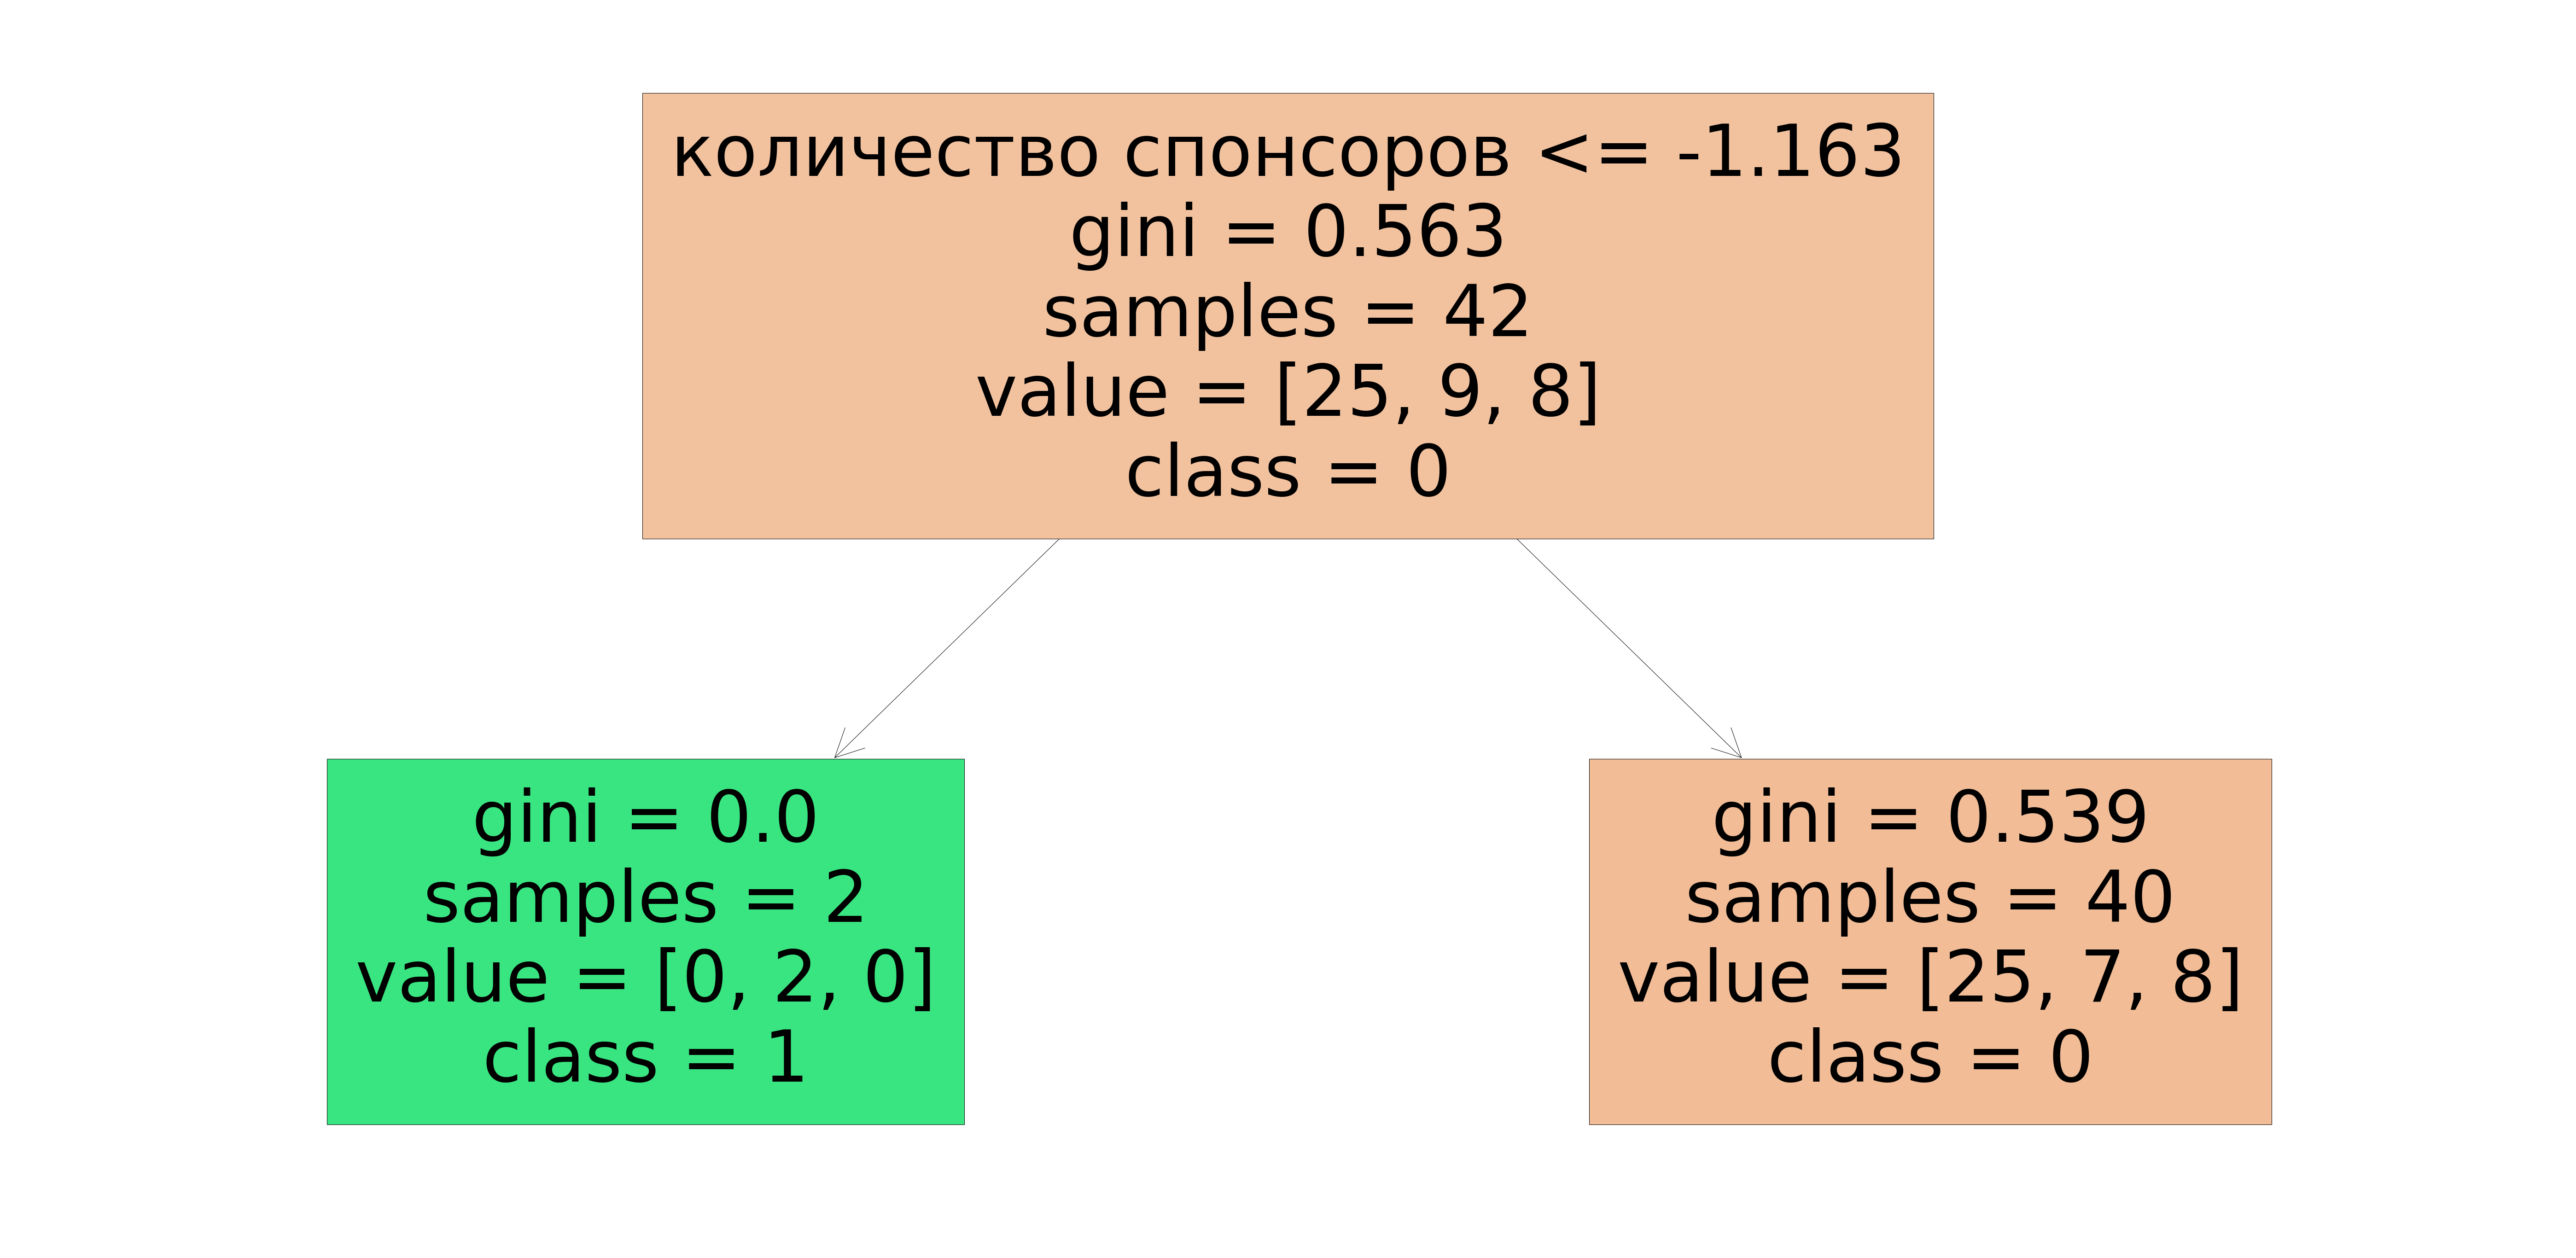

In [59]:
model = DecisionTreeClassifier(max_depth=1,max_features=5, random_state=17)
model.fit(X_train, Y_train)

from sklearn import tree

fig = plt.figure(figsize=(100,50))
fig = tree.plot_tree(model,filled=True,feature_names=data_new.columns, class_names=["0","1"])

# Вычисление outliers

Outliers 2016

Далее приведен код вычисления "выбросов" для 2016 года. Изменив год в таблице, можно вычислить "выбросы" для других лет.

In [3]:
data2016 = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="2016")

In [349]:
lower_bound = data2016.main_sponsor.quantile(q=0.025)

In [351]:
upper_bound = data2016.main_sponsor.quantile(q=0.975)

In [353]:
data2016[(data2016.main_sponsor < lower_bound) | (data2016.main_sponsor > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
8,118.0,0.0,12,0,0,0.0,6.8,30.0,23.5,17.4,...,5.3,9.0,10.0,9.3,1.2,2.5,130,130.0,0.0,1
9,15.0,0.0,40,80,10,0.0,6.5,25.7,25.0,16.3,...,5.0,10.0,15.0,6.6,1.0,0.9,145,137.0,8.0,2


In [355]:
lower_bound = data2016.material_salling.quantile(q=0.025)

In [356]:
upper_bound = data2016.material_salling.quantile(q=0.975)

In [357]:
lower_bound

0.0

In [358]:
upper_bound

16.0075

In [359]:
data2016[(data2016.material_salling < lower_bound) | (data2016.material_salling > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
5,35.0,16.3,15,60,0,3.7,6.0,30.1,22.0,16.8,...,5.0,9.5,11.0,6.1,0.8,1.7,130,129.0,1.0,2


In [360]:
lower_bound = data2016.sponsorship.quantile(q=0.025)

In [361]:
upper_bound = data2016.sponsorship.quantile(q=0.975)

In [362]:
lower_bound

12.225000000000001

In [364]:
upper_bound

99.37500000000001

In [365]:
data2016[(data2016.sponsorship < lower_bound) | (data2016.sponsorship > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
0,50.0,10.0,105,100,75,5.0,25.4,70.3,52.1,42.2,...,12.5,40.0,45.0,7.9,3.1,1.5,345,350.0,-5.0,0
8,118.0,0.0,12,0,0,0.0,6.8,30.0,23.5,17.4,...,5.3,9.0,10.0,9.3,1.2,2.5,130,130.0,0.0,1


In [366]:
lower_bound = data2016.prize_payouts.quantile(q=0.025)

In [367]:
upper_bound = data2016.prize_payouts.quantile(q=0.975)

In [368]:
data2016[(data2016.prize_payouts < lower_bound) | (data2016.prize_payouts > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
0,50.0,10.0,105,100,75,5.0,25.4,70.3,52.1,42.2,...,12.5,40.0,45.0,7.9,3.1,1.5,345,350.0,-5.0,0
8,118.0,0.0,12,0,0,0.0,6.8,30.0,23.5,17.4,...,5.3,9.0,10.0,9.3,1.2,2.5,130,130.0,0.0,1


In [381]:
lower_bound = data2016.FIA_bonus.quantile(q=0.025)

In [382]:
upper_bound = data2016.FIA_bonus.quantile(q=0.975)

In [383]:
data2016[(data2016.FIA_bonus < lower_bound) | (data2016.FIA_bonus > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0


In [4]:
lower_bound = data2016.change_in_the_value_of_products_under_development.quantile(q=0.025)

In [5]:
upper_bound = data2016.change_in_the_value_of_products_under_development.quantile(q=0.975)

In [6]:
data2016[(data2016.change_in_the_value_of_products_under_development < lower_bound) | (data2016.change_in_the_value_of_products_under_development > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing_fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0


In [387]:
lower_bound = data2016.research_development.quantile(q=0.025)

In [388]:
upper_bound = data2016.research_development.quantile(q=0.975)

In [389]:
data2016[(data2016.research_development < lower_bound) | (data2016.research_development > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0
5,35.0,16.3,15,60,0,3.7,6.0,30.1,22.0,16.8,...,5.0,9.5,11.0,6.1,0.8,1.7,130,129.0,1.0,2


In [390]:
lower_bound = data2016.clothing_stickers_components_aerodynamic_range.quantile(q=0.025)

In [391]:
upper_bound = data2016.clothing_stickers_components_aerodynamic_range.quantile(q=0.975)

In [392]:
data2016[(data2016.clothing_stickers_components_aerodynamic_range < lower_bound) | (data2016.clothing_stickers_components_aerodynamic_range > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
0,50.0,10.0,105,100,75,5.0,25.4,70.3,52.1,42.2,...,12.5,40.0,45.0,7.9,3.1,1.5,345,350.0,-5.0,0
9,15.0,0.0,40,80,10,0.0,6.5,25.7,25.0,16.3,...,5.0,10.0,15.0,6.6,1.0,0.9,145,137.0,8.0,2


In [393]:
lower_bound = data2016.flights_maintenance_repairs_transportation_fees_energy_telecommunications.quantile(q=0.025)

In [394]:
upper_bound = data2016.flights_maintenance_repairs_transportation_fees_energy_telecommunications.quantile(q=0.975)

In [397]:
data2016[(data2016.flights_maintenance_repairs_transportation_fees_energy_telecommunications < lower_bound) | (data2016.flights_maintenance_repairs_transportation_fees_energy_telecommunications > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre-season_tests,...,non-cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0


In [405]:
lower_bound = data2016.rental_of_estate_cars_pre_season_tests.quantile(q=0.025)

In [406]:
upper_bound = data2016.rental_of_estate_cars_pre_season_tests.quantile(q=0.975)

In [407]:
data2016[(data2016.rental_of_estate_cars_pre_season_tests < lower_bound) | (data2016.rental_of_estate_cars_pre_season_tests > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0
9,15.0,0.0,40,80,10,0.0,6.5,25.7,25.0,16.3,...,5.0,10.0,15.0,6.6,1.0,0.9,145,137.0,8.0,2


In [408]:
lower_bound = data2016.non_cash_payments.quantile(q=0.025)

In [409]:
upper_bound = data2016.non_cash_payments.quantile(q=0.975)

In [410]:
data2016[(data2016.non_cash_payments < lower_bound) | (data2016.non_cash_payments > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0


In [411]:
lower_bound = data2016.work_on_tests.quantile(q=0.025)

In [412]:
upper_bound = data2016.work_on_tests.quantile(q=0.975)

In [413]:
data2016[(data2016.work_on_tests < lower_bound) | (data2016.work_on_tests > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0
6,40.0,2.0,13,65,0,0.0,6.3,30.6,23.0,16.5,...,5.0,8.0,8.0,5.3,0.8,1.5,120,125.0,-5.0,0


In [414]:
lower_bound = data2016.work_on_grand_prix.quantile(q=0.025)

In [415]:
upper_bound = data2016.work_on_grand_prix.quantile(q=0.975)

In [416]:
data2016[(data2016.work_on_grand_prix < lower_bound) | (data2016.work_on_grand_prix > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0
6,40.0,2.0,13,65,0,0.0,6.3,30.6,23.0,16.5,...,5.0,8.0,8.0,5.3,0.8,1.5,120,125.0,-5.0,0


In [417]:
lower_bound = data2016.motors.quantile(q=0.025)

In [420]:
lower_bound

5.145

In [418]:
upper_bound = data2016.motors.quantile(q=0.975)

In [421]:
upper_bound

9.3

In [419]:
data2016[(data2016.motors < lower_bound) | (data2016.motors > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
7,35.0,8.0,30,45,0,2.0,6.5,26.6,22.0,18.8,...,5.0,10.0,10.0,5.1,0.7,1.3,120,129.0,-9.0,0


In [428]:
lower_bound = data2016.corporate_events.quantile(q=0.025)

In [429]:
upper_bound = data2016.corporate_events.quantile(q=0.975)

In [430]:
data2016[(data2016.corporate_events < lower_bound) | (data2016.corporate_events > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing_fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
0,50.0,10.0,105,100,75,5.0,25.4,70.3,52.1,42.2,...,12.5,40.0,45.0,7.9,3.1,1.5,345,350.0,-5.0,0
7,35.0,8.0,30,45,0,2.0,6.5,26.6,22.0,18.8,...,5.0,10.0,10.0,5.1,0.7,1.3,120,129.0,-9.0,0


In [431]:
lower_bound = data2016.racing_fee_membership_fees_fines_penalties.quantile(q=0.025)

In [432]:
upper_bound = data2016.racing_fee_membership_fees_fines_penalties.quantile(q=0.975)

In [433]:
data2016[(data2016.racing_fee_membership_fees_fines_penalties < lower_bound) | (data2016.racing_fee_membership_fees_fines_penalties > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing_fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
8,118.0,0.0,12,0,0,0.0,6.8,30.0,23.5,17.4,...,5.3,9.0,10.0,9.3,1.2,2.5,130,130.0,0.0,1
9,15.0,0.0,40,80,10,0.0,6.5,25.7,25.0,16.3,...,5.0,10.0,15.0,6.6,1.0,0.9,145,137.0,8.0,2


In [434]:
lower_bound = data2016.total_receipt.quantile(q=0.025)

In [435]:
upper_bound = data2016.total_receipt.quantile(q=0.975)

In [436]:
data2016[(data2016.total_receipt < lower_bound) | (data2016.total_receipt > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing_fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0


In [437]:
lower_bound = data2016.total_costs.quantile(q=0.025)

In [438]:
upper_bound = data2016.total_costs.quantile(q=0.975)

In [439]:
data2016[(data2016.total_costs < lower_bound) | (data2016.total_costs > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing_fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0
6,40.0,2.0,13,65,0,0.0,6.3,30.6,23.0,16.5,...,5.0,8.0,8.0,5.3,0.8,1.5,120,125.0,-5.0,0


In [440]:
lower_bound = data2016.profit.quantile(q=0.025)

In [441]:
upper_bound = data2016.profit.quantile(q=0.975)

In [442]:
data2016[(data2016.profit < lower_bound) | (data2016.profit > upper_bound)]

,main_sponsor,material_salling,sponsorship,prize_payouts,FIA_bonus,change_in_the_value_of_products_under_development,research_development,clothing_stickers_components_aerodynamic_range,flights_maintenance_repairs_transportation_fees_energy_telecommunications,rental_of_estate_cars_pre_season_tests,...,non_cash_payments,work_on_tests,work_on_grand_prix,motors,corporate_events,racing_fee_membership_fees_fines_penalties,total_receipt,total_costs,profit,classification
2,52.5,15.0,80,90,105,7.5,44.6,65.0,60.7,43.7,...,13.8,41.0,46.0,8.3,2.9,2.0,350,385.0,-35.0,0


Outliers new parameters

In [7]:
data_new = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="2016new")

In [8]:
data_new

,constructors_championship,number_of_worldchamp,foundation_year,number_of_sponsors,average_place_in_three_years,classification
0,3,2,2010,16,1,0
1,4,0,2005,17,3,2
2,16,1,1950,38,3,0
3,8,0,1966,51,8,0
4,2,0,1977,29,8,1
5,0,0,2005,11,7,2
6,0,0,2018,25,5,0
7,0,0,2019,16,10,0
8,0,0,2014,10,8,1
9,9,0,1977,59,4,2


In [12]:
lower_bound = data_new.constructors_championship.quantile(q=0.025)

In [13]:
upper_bound = data_new.constructors_championship.quantile(q=0.975)

In [14]:
data_new[(data_new.constructors_championship < lower_bound) | (data_new.constructors_championship > upper_bound)]

,constructors_championship,number_of_worldchamp,foundation_year,number_of_sponsors,average_place_in_three_years,classification
2,16,1,1950,38,3,0


In [15]:
lower_bound = data_new.number_of_worldchamp.quantile(q=0.025)

In [16]:
upper_bound = data_new.number_of_worldchamp.quantile(q=0.975)

In [17]:
data_new[(data_new.number_of_worldchamp < lower_bound) | (data_new.number_of_worldchamp > upper_bound)]

,constructors_championship,number_of_worldchamp,foundation_year,number_of_sponsors,average_place_in_three_years,classification
0,3,2,2010,16,1,0


In [18]:
lower_bound = data_new.foundation_year.quantile(q=0.025)

In [19]:
upper_bound = data_new.foundation_year.quantile(q=0.975)

In [20]:
data_new[(data_new.foundation_year < lower_bound) | (data_new.foundation_year > upper_bound)]

,constructors_championship,number_of_worldchamp,foundation_year,number_of_sponsors,average_place_in_three_years,classification
2,16,1,1950,38,3,0
7,0,0,2019,16,10,0


In [21]:
lower_bound = data_new.number_of_sponsors.quantile(q=0.025)

In [22]:
upper_bound = data_new.number_of_sponsors.quantile(q=0.975)

In [23]:
data_new[(data_new.number_of_sponsors < lower_bound) | (data_new.number_of_sponsors > upper_bound)]

,constructors_championship,number_of_worldchamp,foundation_year,number_of_sponsors,average_place_in_three_years,classification
8,0,0,2014,10,8,1
9,9,0,1977,59,4,2


In [24]:
lower_bound = data_new.average_place_in_three_years.quantile(q=0.025)

In [25]:
upper_bound = data_new.average_place_in_three_years.quantile(q=0.975)

In [26]:
data_new[(data_new.average_place_in_three_years < lower_bound) | (data_new.average_place_in_three_years > upper_bound)]

,constructors_championship,number_of_worldchamp,foundation_year,number_of_sponsors,average_place_in_three_years,classification
0,3,2,2010,16,1,0
7,0,0,2019,16,10,0


# Метод главных компонент

In [89]:
data = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="final")

In [151]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

In [39]:
pca_2d

array([[ 8.21527737e+01, -1.52635487e+01],
       [ 3.89934126e+01,  1.73195452e+01],
       [ 8.88091181e+01, -7.27627614e+00],
       [ 1.77852365e+01,  2.59258643e+01],
       [-3.60537876e+01,  4.93614603e+01],
       [-6.51499174e+01, -9.20057193e+00],
       [-6.62268944e+01, -6.59477661e+00],
       [-5.98631888e+01, -8.06856047e+00],
       [-7.08839674e+01,  8.41614192e+01],
       [-4.29697101e+01, -3.90854167e+01],
       [ 9.48391585e+01, -3.09295555e+00],
       [ 4.93651726e+01, -1.45801035e+01],
       [ 1.59871091e+02, -3.22421054e+01],
       [ 1.40885511e+01,  1.41158948e+01],
       [-2.98546166e+01,  5.16426457e+01],
       [-5.62636979e+01, -5.45359627e+00],
       [-6.50458896e+01, -1.14244291e+01],
       [-3.97883338e+01, -1.96937743e+01],
       [-5.90736191e+01,  4.96785346e+01],
       [-2.26412615e+01, -4.03080774e+01],
       [ 1.12123640e+02,  1.08615257e+01],
       [ 6.62309258e+01,  2.75492013e+00],
       [ 9.86612096e+01,  4.48021367e+01],
       [-1.

# Кластеризация

In [3]:
data = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="finalnew")

In [208]:
data.values

array([[   3,    2, 2010,   16,    1,    0],
       [   4,    0, 2005,   17,    3,    2],
       [  16,    1, 1950,   38,    3,    0],
       [   8,    0, 1966,   51,    8,    0],
       [   2,    0, 1977,   29,    8,    1],
       [   0,    0, 2005,   11,    7,    2],
       [   0,    0, 2018,   25,    5,    0],
       [   0,    0, 2019,   16,   10,    0],
       [   0,    0, 2014,   10,    8,    1],
       [   9,    0, 1977,   59,    4,    2],
       [   4,    1, 2010,   17,    1,    0],
       [   4,    0, 2005,   18,    3,    2],
       [  16,    1, 1950,   41,    2,    0],
       [   8,    0, 1966,   48,    8,    0],
       [   2,    0, 1977,   31,    6,    0],
       [   0,    0, 2005,   13,    7,    0],
       [   0,    0, 2018,   23,    6,    0],
       [   0,    0, 2019,   18,   10,    0],
       [   0,    0, 2014,   15,    8,    0],
       [   9,    0, 1977,   61,    4,    0],
       [   5,    1, 2010,   18,    1,    2],
       [   4,    0, 2005,   19,    3,    2],
       [  

In [4]:
y = data["классификация"]

In [166]:
np.array(y)

array([0, 2, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 2], dtype=int64)

In [167]:
np.split(np.array(y),6)

[array([0, 2, 0, 0, 1, 2, 0, 0, 1, 2], dtype=int64),
 array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([2, 2, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64),
 array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64),
 array([2, 2, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64),
 array([2, 2, 2, 2, 0, 1, 2, 1, 0, 2], dtype=int64)]

In [95]:
data = data.drop(data.columns[[17,18,19,20,21,22,23,24,25]], axis = 1)

In [5]:
data = data.drop(data.columns[[5]], axis = 1)

In [6]:
X = data.values
X

array([[   3,    2, 2010,   16,    1],
       [   4,    0, 2005,   17,    3],
       [  16,    1, 1950,   38,    3],
       [   8,    0, 1966,   51,    8],
       [   2,    0, 1977,   29,    8],
       [   0,    0, 2005,   11,    7],
       [   0,    0, 2018,   25,    5],
       [   0,    0, 2019,   16,   10],
       [   0,    0, 2014,   10,    8],
       [   9,    0, 1977,   59,    4],
       [   4,    1, 2010,   17,    1],
       [   4,    0, 2005,   18,    3],
       [  16,    1, 1950,   41,    2],
       [   8,    0, 1966,   48,    8],
       [   2,    0, 1977,   31,    6],
       [   0,    0, 2005,   13,    7],
       [   0,    0, 2018,   23,    6],
       [   0,    0, 2019,   18,   10],
       [   0,    0, 2014,   15,    8],
       [   9,    0, 1977,   61,    4],
       [   5,    1, 2010,   18,    1],
       [   4,    0, 2005,   19,    3],
       [  16,    1, 1950,   42,    2],
       [   8,    0, 1966,   50,    7],
       [   2,    1, 1977,   31,    5],
       [   0,    0, 2005,

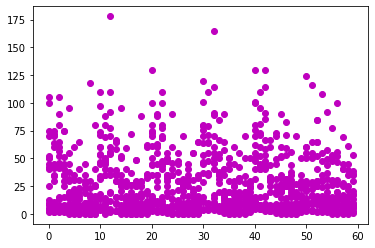

In [97]:
X = data.values
plt.plot(X, "mo")

Метод k-средних

In [98]:
from sklearn.cluster import KMeans

In [99]:
model = KMeans(n_clusters = 3)

In [100]:
model.fit(X)

KMeans(n_clusters=3)

In [101]:
predicted_label = model.predict([X[0]])

In [102]:
predicted_label

array([0])

In [103]:
all_predictions = model.predict(X)

In [104]:
all_predictions

array([0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1])

In [105]:
np.split(all_predictions, 6)

[array([0, 0, 0, 2, 2, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 2, 2, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 1, 2, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 2, 2, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 2, 2, 2, 2, 1, 1, 1]),
 array([2, 2, 0, 2, 2, 2, 2, 1, 1, 1])]

In [106]:
np.split(np.array(y),6)

[array([0, 2, 0, 0, 1, 2, 0, 0, 1, 2], dtype=int64),
 array([0, 2, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([2, 2, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64),
 array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64),
 array([2, 2, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64),
 array([2, 2, 2, 2, 0, 1, 2, 1, 0, 2], dtype=int64)]

TSNE метод

In [196]:
data = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="final")

In [197]:
y = data["классификация"]

In [112]:
data = data.drop(data.columns[[5]], axis = 1)

In [198]:
data = data.drop(data.columns[[17,18,19,20,21,22,23,24,25]], axis = 1)

In [199]:
X = data.values

In [146]:
from sklearn.manifold import TSNE

In [147]:
model = TSNE()

In [148]:
transformed = model.fit_transform(X)

In [149]:
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

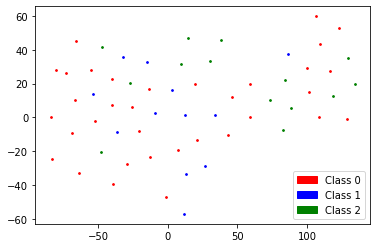

In [150]:
import matplotlib.patches as mpatches

class_0 = mpatches.Patch(color='red', label='Class 0')
class_1 = mpatches.Patch(color='blue', label='Class 1')
class_2 = mpatches.Patch(color='green', label='Class 2')

for i in range(60):
    if y[i]==0:
        plt.scatter(transformed[i, 0], transformed[i, 1], 3, color='red')
    if y[i]==1:
        plt.scatter(transformed[i, 0], transformed[i, 1], 3, color='blue')
    if y[i]==2:
        plt.scatter(transformed[i, 0], transformed[i, 1], 3, color='green')

plt.legend(handles=[class_0,class_1,class_2])
plt.show()

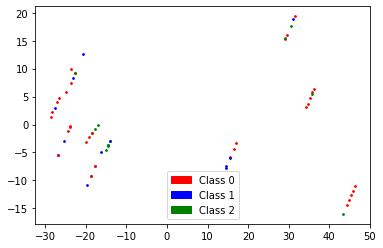

In [18]:
import matplotlib.patches as mpatches

class_0 = mpatches.Patch(color='red', label='Class 0')
class_1 = mpatches.Patch(color='blue', label='Class 1')
class_2 = mpatches.Patch(color='green', label='Class 2')

for i in range(60):
    if y[i]==0:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], 3, color='red')
    if y[i]==1:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], 3, color='blue')
    if y[i]==2:
        plt.scatter(pca_2d[i, 0], pca_2d[i, 1], 3, color='green')

plt.legend(handles=[class_0,class_1,class_2])
plt.show()

Используя центроиды

In [19]:
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2).fit(X)
pca_2d = pca.transform(X)

In [21]:
np.random.seed(seed=42)
centroids = np.random.normal(loc=0.0, scale=1., size=6)
centroids = centroids.reshape((3, 2))

In [22]:
cent_history = [centroids]

In [23]:
centroids

array([[ 0.49671415, -0.1382643 ],
       [ 0.64768854,  1.52302986],
       [-0.23415337, -0.23413696]])

In [24]:
for i in range(3):
    distances = cdist(pca_2d, centroids)
    labels = distances.argmin(axis=1)
    centroids = centroids.copy()
    centroids[0, :] = np.mean(pca_2d[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(pca_2d[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(pca_2d[labels == 2, :], axis=0)
    cent_history.append(centroids)

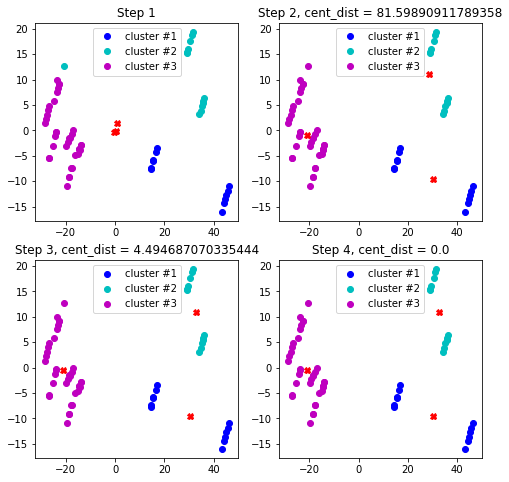

In [25]:
plt.figure(figsize=(8, 8))
for i in range(4):
    distances = cdist(pca_2d, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.subplot(2, 2, i + 1)
    plt.plot(pca_2d[labels == 0, 0], pca_2d[labels == 0, 1], 'bo', label='cluster #1')
    plt.plot(pca_2d[labels == 1, 0], pca_2d[labels == 1, 1], 'co', label='cluster #2')
    plt.plot(pca_2d[labels == 2, 0], pca_2d[labels == 2, 1], 'mo', label='cluster #3')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    if i == 0:
        plt.title('Step {}'.format(i + 1))
    else:
        plt.title('Step {}, cent_dist = {}'.format(i + 1,np.sum([np.linalg.norm(elem) for 
                                                                 elem in cent_history[i-1]-cent_history[i]])));

In [26]:
cent_history[0]-cent_history[1]

array([[-29.75814338,   9.37437585],
       [-28.01016986,  -9.5895701 ],
       [ 20.78328804,   0.63192355]])

In [27]:
np.sum([np.linalg.norm(elem) for elem in cent_history[2]-cent_history[3]])

0.0

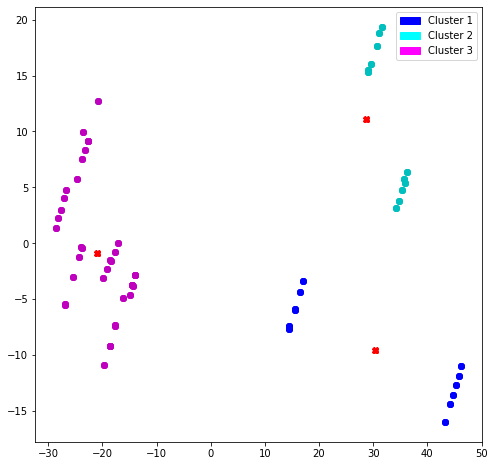

In [33]:
plt.figure(figsize=(8, 8))
for i in range(3):
    
    cluster_1 = mpatches.Patch(color='blue', label='Cluster 1')
    cluster_2 = mpatches.Patch(color='cyan', label='Cluster 2')
    cluster_3 = mpatches.Patch(color='magenta', label='Cluster 3')
    
    distances = cdist(pca_2d, cent_history[i])
    labels = distances.argmin(axis=1)

    plt.plot(pca_2d[labels == 0, 0], pca_2d[labels == 0, 1], 'bo')
    plt.plot(pca_2d[labels == 1, 0], pca_2d[labels == 1, 1], 'co')
    plt.plot(pca_2d[labels == 2, 0], pca_2d[labels == 2, 1], 'mo')
    plt.plot(cent_history[1][:, 0], cent_history[1][:, 1], 'rX')
    plt.legend(handles=[cluster_1,cluster_2,cluster_3])

# Графическая визуализация

In [193]:
data = pd.read_excel(r'F:\учеба\курсовая\analysis.xlsx', sheet_name="final")

In [194]:
merc = data.iloc[0:60:10,17]
merc1 = data.iloc[0:60:10,18]
merc2 = data.iloc[0:60:10,19]

In [195]:
red = data.iloc[1:60:10,17]
red1 = data.iloc[1:60:10,18]
red2 = data.iloc[1:60:10,19]

In [196]:
fer = data.iloc[2:60:10,17]
fer1 = data.iloc[2:60:10,18]
fer2 = data.iloc[2:60:10,19]

In [197]:
mcl = data.iloc[3:60:10,17]
mcl1 = data.iloc[3:60:10,18]
mcl2 = data.iloc[3:60:10,19]

In [198]:
alp = data.iloc[4:60:10,17]
alp1 = data.iloc[4:60:10,18]
alp2 = data.iloc[4:60:10,19]

In [199]:
tor = data.iloc[5:60:10,17]
tor1 = data.iloc[5:60:10,18]
tor2 = data.iloc[5:60:10,19]

In [200]:
ast = data.iloc[6:60:10,17]
ast1 = data.iloc[6:60:10,18]
ast2 = data.iloc[6:60:10,19]

In [201]:
alf = data.iloc[7:60:10,17]
alf1 = data.iloc[7:60:10,18]
alf2 = data.iloc[7:60:10,19]

In [202]:
haa = data.iloc[8:60:10,17]
haa1 = data.iloc[8:60:10,18]
haa2 = data.iloc[8:60:10,19]

In [203]:
wil = data.iloc[9:60:10,17]
wil1 = data.iloc[9:60:10,18]
wil2 = data.iloc[9:60:10,19]

In [204]:
merc_val = merc.values
merc_val

array([345, 389, 415, 420, 450, 278], dtype=int64)

In [205]:
red_val = red.values
red_val

array([288, 295, 315, 335, 390, 260], dtype=int64)

In [206]:
fer_val = fer.values
fer_val

array([350, 416, 410, 435, 400, 300], dtype=int64)

In [207]:
mcl_val = mcl.values
mcl_val

array([245, 245, 220, 250, 200, 210], dtype=int64)

In [208]:
alp_val = alp.values
alp_val

array([200, 200, 190, 210, 205, 210], dtype=int64)

In [209]:
tor_val = tor.values
tor_val

array([130, 137, 150, 155, 225, 195], dtype=int64)

In [210]:
ast_val = ast.values
ast_val

array([120, 122, 120, 155, 254, 230], dtype=int64)

In [211]:
alf_val = alf.values
alf_val

array([120, 138, 135, 147, 180, 170], dtype=int64)

In [212]:
haa_val = haa.values
haa_val

array([130, 135, 130, 143, 100, 150], dtype=int64)

In [213]:
wil_val = wil.values
wil_val

array([145, 161, 150, 125, 150, 160], dtype=int64)

In [214]:
years = [2016,2017,2018,2019,2020,2021]

Text(0.5, 0, 'Years')

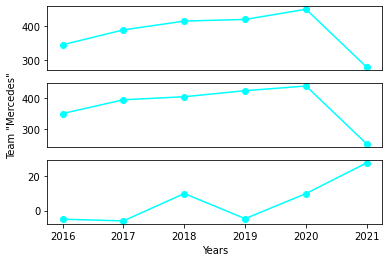

In [223]:
plt.subplot(311)
plt.plot(years, merc_val, marker = 'o', color='cyan', label='Receipt')
plt.xticks([])

plt.subplot(312)
plt.plot(years, merc1.values, marker = 'o', color='cyan', label='Costs')
plt.xticks([])
plt.ylabel('Team "Mercedes"')

plt.subplot(313)
plt.plot(years, merc2.values, marker = 'o', color='cyan', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

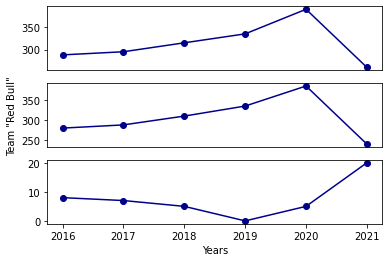

In [224]:
plt.subplot(311)
plt.plot(years, red_val, marker = 'o', color='darkblue', label='Receipt')
plt.xticks([])

plt.subplot(312)
plt.plot(years, red1.values, marker = 'o', color='darkblue', label='Costs')
plt.xticks([])
plt.ylabel('Team "Red Bull"')

plt.subplot(313)
plt.plot(years, red2.values, marker = 'o', color='darkblue', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

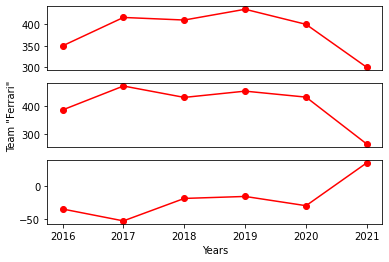

In [227]:
plt.subplot(311)
plt.plot(years, fer_val, marker = 'o', color='red', label='Receipt')
plt.xticks([])

plt.subplot(312)
plt.plot(years, fer1.values, marker = 'o', color='red', label='Costs')
plt.xticks([])
plt.ylabel('Team "Ferrari"')

plt.subplot(313)
plt.plot(years, fer2.values, marker = 'o', color='red', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

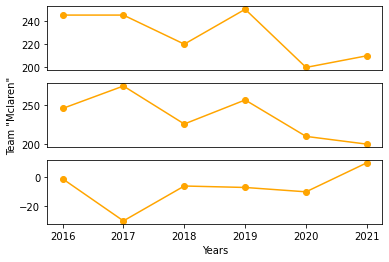

In [228]:
plt.subplot(311)
plt.plot(years, mcl_val, marker = 'o', color='orange', label='Mclaren')
plt.xticks([])

plt.subplot(312)
plt.plot(years, mcl1.values, marker = 'o', color='orange', label='Costs')
plt.xticks([])
plt.ylabel('Team "Mclaren"')

plt.subplot(313)
plt.plot(years, mcl2.values, marker = 'o', color='orange', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

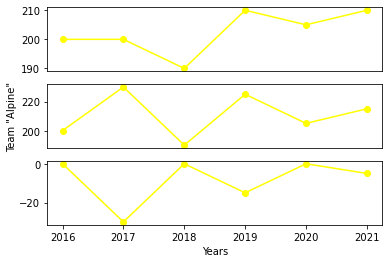

In [229]:
plt.subplot(311)
plt.plot(years, alp_val, marker = 'o', color='yellow', label='Apline')
plt.xticks([])

plt.subplot(312)
plt.plot(years, alp1.values, marker = 'o', color='yellow', label='Costs')
plt.xticks([])
plt.ylabel('Team "Alpine"')

plt.subplot(313)
plt.plot(years, alp2.values, marker = 'o', color='yellow', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

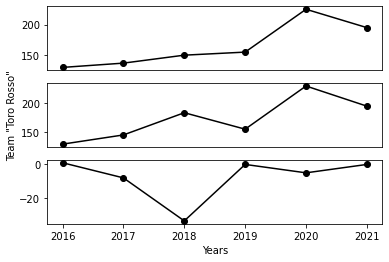

In [230]:
plt.subplot(311)
plt.plot(years, tor_val, marker = 'o', color='black', label='Toro Rosso')
plt.xticks([])

plt.subplot(312)
plt.plot(years, tor1.values, marker = 'o', color='black', label='Costs')
plt.xticks([])
plt.ylabel('Team "Toro Rosso"')

plt.subplot(313)
plt.plot(years, tor2.values, marker = 'o', color='black', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

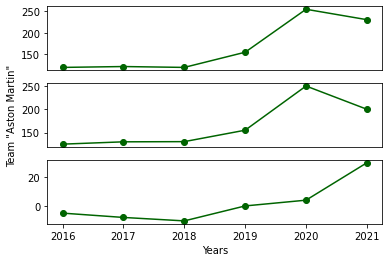

In [231]:
plt.subplot(311)
plt.plot(years, ast_val, marker = 'o', color='darkgreen', label='Aston Martin')
plt.xticks([])

plt.subplot(312)
plt.plot(years, ast1.values, marker = 'o', color='darkgreen', label='Costs')
plt.xticks([])
plt.ylabel('Team "Aston Martin"')

plt.subplot(313)
plt.plot(years, ast2.values, marker = 'o', color='darkgreen', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

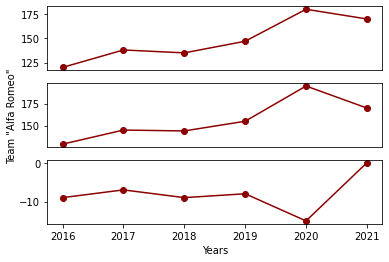

In [232]:
plt.subplot(311)
plt.plot(years, alf_val, marker = 'o', color='darkred', label='Alfa Romeo')
plt.xticks([])

plt.subplot(312)
plt.plot(years, alf1.values, marker = 'o', color='darkred', label='Costs')
plt.xticks([])
plt.ylabel('Team "Alfa Romeo"')

plt.subplot(313)
plt.plot(years, alf2.values, marker = 'o', color='darkred', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

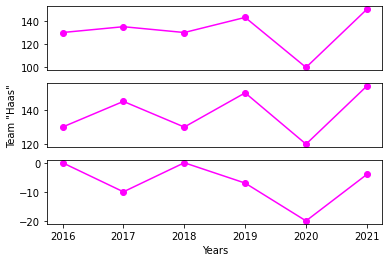

In [233]:
plt.subplot(311)
plt.plot(years, haa_val, marker = 'o', color='magenta', label='Haas')
plt.xticks([])

plt.subplot(312)
plt.plot(years, haa1.values, marker = 'o', color='magenta', label='Costs')
plt.xticks([])
plt.ylabel('Team "Haas"')

plt.subplot(313)
plt.plot(years, haa2.values, marker = 'o', color='magenta', label='Profit')
plt.xlabel("Years")

Text(0.5, 0, 'Years')

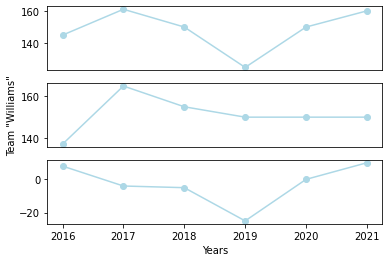

In [234]:
plt.subplot(311)
plt.plot(years, wil_val, marker = 'o', color='lightblue', label='Williams')
plt.xticks([])

plt.subplot(312)
plt.plot(years, wil1.values, marker = 'o', color='lightblue', label='Costs')
plt.xticks([])
plt.ylabel('Team "Williams"')

plt.subplot(313)
plt.plot(years, wil2.values, marker = 'o', color='lightblue', label='Profit')
plt.xlabel("Years")

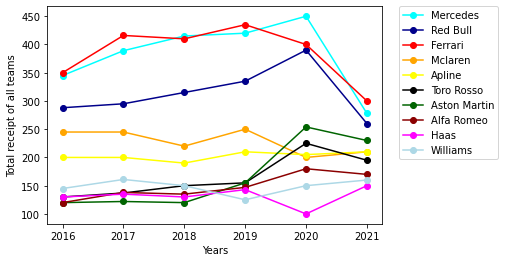

In [235]:
plt.plot(years, merc_val, marker = 'o', color='cyan', label='Mercedes')

plt.plot(years, red_val, marker = 'o', color='darkblue', label='Red Bull')

plt.plot(years, fer_val, marker = 'o', color='red', label='Ferrari')

plt.plot(years, mcl_val, marker = 'o', color='orange', label='Mclaren')

plt.plot(years, alp_val, marker = 'o', color='yellow', label='Apline')

plt.plot(years, tor_val, marker = 'o', color='black', label='Toro Rosso')

plt.plot(years, ast_val, marker = 'o', color='darkgreen', label='Aston Martin')

plt.plot(years, alf_val, marker = 'o', color='darkred', label='Alfa Romeo')

plt.plot(years, haa_val, marker = 'o', color='magenta', label='Haas')

plt.plot(years, wil_val, marker = 'o', color='lightblue', label='Williams')

plt.xlabel("Years")
plt.ylabel('Total receipt of all teams')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

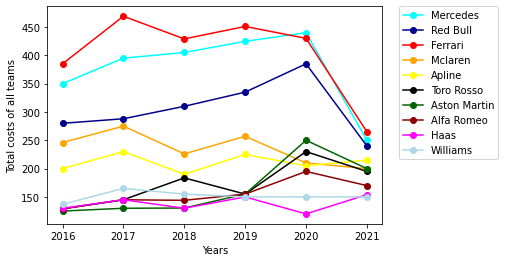

In [237]:
plt.plot(years, merc1, marker = 'o', color='cyan', label='Mercedes')

plt.plot(years, red1, marker = 'o', color='darkblue', label='Red Bull')

plt.plot(years, fer1, marker = 'o', color='red', label='Ferrari')

plt.plot(years, mcl1, marker = 'o', color='orange', label='Mclaren')

plt.plot(years, alp1, marker = 'o', color='yellow', label='Apline')

plt.plot(years, tor1, marker = 'o', color='black', label='Toro Rosso')

plt.plot(years, ast1, marker = 'o', color='darkgreen', label='Aston Martin')

plt.plot(years, alf1, marker = 'o', color='darkred', label='Alfa Romeo')

plt.plot(years, haa1, marker = 'o', color='magenta', label='Haas')

plt.plot(years, wil1, marker = 'o', color='lightblue', label='Williams')

plt.xlabel("Years")
plt.ylabel('Total costs of all teams')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

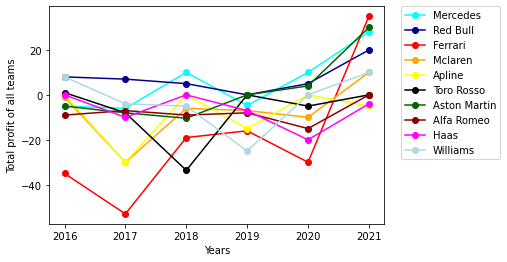

In [238]:
plt.plot(years, merc2, marker = 'o', color='cyan', label='Mercedes')

plt.plot(years, red2, marker = 'o', color='darkblue', label='Red Bull')

plt.plot(years, fer2, marker = 'o', color='red', label='Ferrari')

plt.plot(years, mcl2, marker = 'o', color='orange', label='Mclaren')

plt.plot(years, alp2, marker = 'o', color='yellow', label='Apline')

plt.plot(years, tor2, marker = 'o', color='black', label='Toro Rosso')

plt.plot(years, ast2, marker = 'o', color='darkgreen', label='Aston Martin')

plt.plot(years, alf2, marker = 'o', color='darkred', label='Alfa Romeo')

plt.plot(years, haa2, marker = 'o', color='magenta', label='Haas')

plt.plot(years, wil2, marker = 'o', color='lightblue', label='Williams')

plt.xlabel("Years")
plt.ylabel('Total profit of all teams')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()